### Homework Rakamin Trial Class - Mini Case

# Mengukur Performa Penjualan Ritel Online

<p> Bayangkan kamu sedang bekerja di sebuah perusahaan ritel online, dan pelanggannya sudah tersebar dari berbagai negara. Kamu diberikan data yang berisi semua transaksi yang terjadi di tahun 2009-2011. Saat ini kamu diminta untuk menganalisis bagaimana performa penjualan dalam kurun waktu 3 tahun terakhir. </p>

Link download dataset:
https://drive.google.com/drive/folders/1UbsUuQJgkF-7ilhhNL2tOnpzlJ-WS_Fu?usp=sharing

Berikut adalah penjelasan untuk masing-masing kolom.

<b> Attributes </b> <br>
<ul>
  <li> <b> Invoice </b> : Nomor invoice 6 digit yang ditetapkan secara unik untuk setiap transaksi. <br>
Jika kode ini dimulai dengan huruf 'C', itu menunjukkan pembatalan. </li>
  <li> <b> StockCode </b> : Kode produk (barang). Angka 5 digit yang ditetapkan secara unik untuk setiap produk yang berbeda. </li>
  <li> <b> Description </b> : Nama produk. </li>
  <li> <b> Quantity </b> : Jumlah kuantitas setiap produk per transaksi. </li>
  <li> <b> InvoiceDate </b>: Tanggal dan waktu invoice, yakni hari dan waktu saat transaksi dibuat. </li>
  <li> <b> Price </b> : Harga satuan atau harga produk per unit dalam sterling (£). </li>
  <li> <b> CustomerID </b> : Nomor 5 digit yang ditetapkan secara unik untuk setiap pelanggan. </li>
  <li> <b> Country </b> : Nama negara tempat tinggal pelanggan. </li>
  
</ul>










## Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings("ignore") 

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Rakamin Academy/Homework DigiFes by Rakamin/online_retail_II.csv')
data 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


## Section 1 : Menganalisis Rata-Rata Pendapatan Per Tahun

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


### Create New Feature: Year

In [ ]:
df_dataset['InvoiceDate'] = pd.to_datetime(df_dataset['InvoiceDate'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [ ]:
data['Year'] = pd.DatetimeIndex(data['InvoiceDate']).year
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011


### Filtering Data

In [ ]:
sales = data[data['Quantity'] >= 1]
sales

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011


In [ ]:
sales = sales.loc[~sales['Invoice'].str.startswith('C')]
sales

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011


### Create New Feature: Revenue

In [ ]:
sales['Revenue'] = sales['Quantity']*sales['Price']
sales

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.00
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011,14.85


### Average of Revenue per Year

In [ ]:
Avg_Revenue = sales.groupby('Year')['Revenue'].mean().reset_index()
Avg_Revenue

,Year,Revenue
0,2009,18.713273
1,2010,19.908987
2,2011,20.058767


In [ ]:
import matplotlib.pyplot as plt

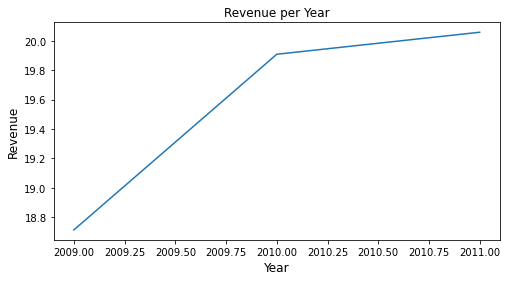

In [ ]:
plt.figure(figsize = (8, 4))
plt.plot(Avg_Revenue['Year'], Avg_Revenue['Revenue'])
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Revenue', fontsize = 12)
plt.title('Revenue per Year', fontsize = 12)
plt.show()

### Interpretation

Revenue paling tinggi pada Tahun 2011 yaitu 20.058767 sterling (£), sementara Revenue paling rendah pada Tahun 2009 yaitu 18.713273 sterling (£)

## Section 2 : Menganalisis Transaksi Pelanggan Per Tahun

### Filtering Data 

#### Customers who finished their purchases

In [ ]:
finished = sales[(sales['Customer ID'] != 0) & (sales['Customer ID'].notna())]
finished

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.00
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011,14.85


#### Customers who canceled their purchases

In [ ]:
cancel = data.loc[data['Invoice'].str.startswith('C')]
cancel

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,2009
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,2009
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,2009
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
...,...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011


### Number of Finished and Canceled Transactions Each Year

In [ ]:
num_finished = finished.groupby('Year').agg(
    customer_finished = ('Customer ID','count')).reset_index()
num_finished.rename(columns={'customer_finished':'Finished Transactions'}, inplace=True)
num_finished

,Year,Finished Transactions
0,2009,30761
1,2010,403094
2,2011,371765


In [ ]:
num_cancel = cancel.groupby('Year').agg(
    customer_cancel = ('Customer ID','count')).reset_index()
num_cancel.rename(columns={'customer_cancel':'Cancelled Transactions'}, inplace=True)
num_cancel

,Year,Cancelled Transactions
0,2009,999
1,2010,9530
2,2011,8215


In [ ]:
transactions = pd.merge(num_finished, num_cancel, on='Year')
transactions

,Year,Finished Transactions,Cancelled Transactions
0,2009,30761,999
1,2010,403094,9530
2,2011,371765,8215


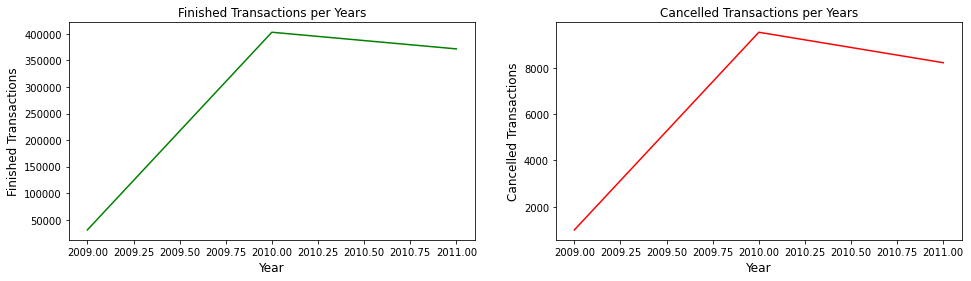

In [ ]:
fig, axes = plt.subplots(1, 2, 
                         figsize = (16, 4))

axes[0].plot(transactions['Year'], transactions['Finished Transactions'], color ='green')
axes[1].plot(transactions['Year'], transactions['Cancelled Transactions'], color ='red')

axes[0].set_xlabel('Year', fontsize = 12)
axes[0].set_ylabel('Finished Transactions', fontsize = 12)
axes[0].set_title('Finished Transactions per Years', fontsize = 12)

axes[1].set_xlabel('Year', fontsize = 12)
axes[1].set_ylabel('Cancelled Transactions', fontsize = 12)
axes[1].set_title('Cancelled Transactions per Years', fontsize = 12)

plt.show()

### Cancellation Rate

In [ ]:
num_customer = data.groupby('Year').agg(
    total_customer = ('Customer ID','count')).reset_index()
num_customer.rename(columns={'total_customer':'Customer'}, inplace=True)
num_customer

,Year,Customer
0,2009,31760
1,2010,412624
2,2011,379980


In [ ]:
num_customer['Cancellation Rate'] = (transactions['Cancelled Transactions']/num_customer['Customer'])*100
num_customer

,Year,Customer,Cancellation Rate
0,2009,31760,3.145466
1,2010,412624,2.309609
2,2011,379980,2.161956


### Interpretation

In [ ]:
customer = pd.merge(transactions, num_customer, on='Year')
customer

,Year,Finished Transactions,Cancelled Transactions,Customer,Cancellation Rate
0,2009,30761,999,31760,3.145466
1,2010,403094,9530,412624,2.309609
2,2011,371765,8215,379980,2.161956


<p> Jumlah <b> Transaksi berhasil paling banyak </b> pada Tahun 2010, sementara jumlah <b> Transaksi dibatalkan paling banyak </b> juga pada Tahun 2010. Hal ini bisa saja terjadi karena jumlah Pelanggan pada Tahun 2010 juga paling banyak dibanding Tahun 2009 dan 2011. </p>

<p> Jumlah <b> Transaksi berhasil paling sedikit </b> pada Tahun 2009 dan jumlah <b> Transaksi dibatalkan paling sedikit </b> juga pada Tahun 2009. Hal ini bisa saja terjadi karena jumlah Pelanggan pada Tahun 2009 juga paling sedikit dibanding Tahun 2010 dan 2011.</p>

<p> <b> Tingkat pembatalan transaksi justru paling tinggi </b> pada Tahun 2009 yaitu sebesar 3.14 % padahal jumlah Pelanggan  pada Tahun 2009 paling sedikit dibanding Tahun 2010 dan 2011. Sementara <b> tingkat pembatalan transaksi yang paling rendah </b> yaitu sebesar 2.16% pada Tahun 2011. </p>